In [2]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following model and parameters $$x_{n+1} = be^{-ax_n}+sx_n$$ $a=0.001, b=0.2, s=0.001, x_0=0.1$

**Question 1:** Find the equilibrium

0.20016013016013018


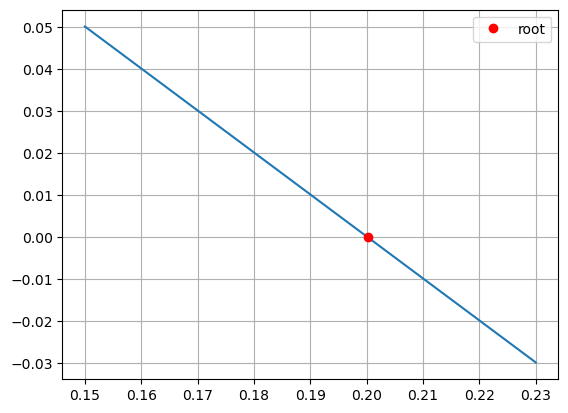

In [25]:
# unconventional way to find the root

a = 0.001
b = 0.2
s = 0.001

x0 = 0.1

def f(x):
    return b*np.exp(-a*x)+s*x-x

xs = np.linspace(0.15,0.23,1000000)
ys = f(xs)
plt.plot(xs, ys)

tol = 1e-8
cloose_enough = [(xs[i],y) for i,y in enumerate(ys) if np.abs(y) < tol]
print(cloose_enough[0][0])
plt.plot(*cloose_enough[0], 'ro', label='root')
plt.legend()
plt.grid()

In [13]:
# disciplined way to find the root

from scipy.optimize import fsolve

x = fsolve(f, x0)
print(x)

[0.20016013]


**Question 2** Plot the first 1000 iterations of the model. What do you observe?

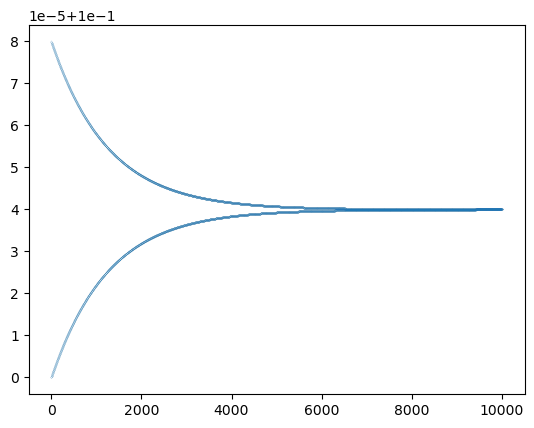

In [39]:
a = 0.001
b = 0.2
s = 0.001

x0 = 0.1

iterations = 10000

def f(x):
    return b*np.exp(-a*x)+s*x-x

xs = [x0]
for i in range(iterations):
    xs.append(f(xs[-1]))
    
plt.plot(xs, '.', markersize=0.1)

**Question 3:** Turn your code from question 2 and look at try finding different behaviour. What do you observe?

In [54]:
def run(f, x0, a=0.001, b=0.2, s=0.001, iterations=10000):
    '''
    Return a list of x values for the difference equation with function f, starting at x0, and iterating iterations times.
    '''
    xs = [x0]
    for i in range(iterations):
        xs.append(f(xs[-1], a, b, s))

    return xs

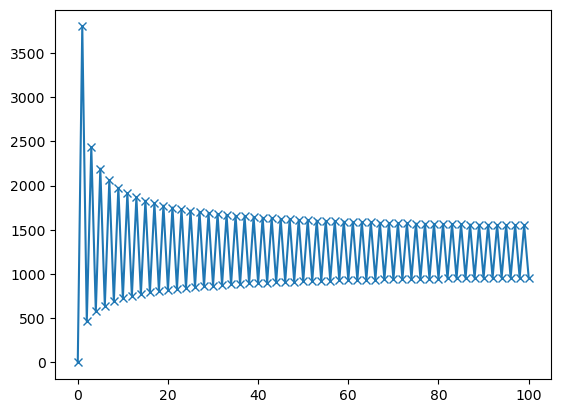

In [66]:
xs = run(lambda x,a,b,s: b*np.exp(-a*x)+s*x, 0.1, a=0.001, b=3800, s=0.1, iterations=100)
plt.plot(xs, '-x')

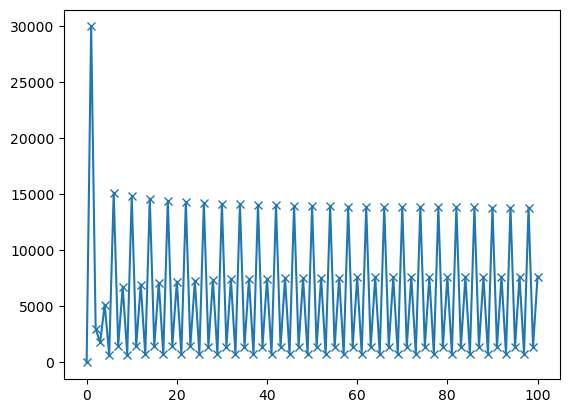

In [69]:
xs = run(lambda x,a,b,s: b*np.exp(-a*x)+s*x, 0.1, a=0.001, b=30000, s=0.1, iterations=100)
plt.plot(xs, '-x')

**Question 4:** Find the attractors for n-periodic cycles when $n=2,3,4$.

In [80]:
from scipy.optimize import fsolve
from functools import reduce 

a = 0.001
b = 3800
s = 0.1
x0 = 0.1

def f(x):
    return b*np.exp(-a*x)+s*x

periods = [2, 3, 4]

compose = lambda f, g: ( lambda x: f(g(x)) )
identity = lambda x : x
composite = lambda f, n: identity if n == 0 else reduce(compose, [f] * n)

for period in periods:
    print(f'period {period}')
    x = fsolve(lambda x: composite(f, period)(x)-x, x0)

    for i in range(period):
        print(composite(f, i)(x))

period 2
[981.58014867]
[1522.0883902]
period 3
[1231.84695215]
[1231.84695215]
[1231.84695215]
period 4
[981.58014867]
[1522.0883902]
[981.58014867]
[1522.0883902]


**Make a plot of the attractors for n=2,3,4 against the solutions**

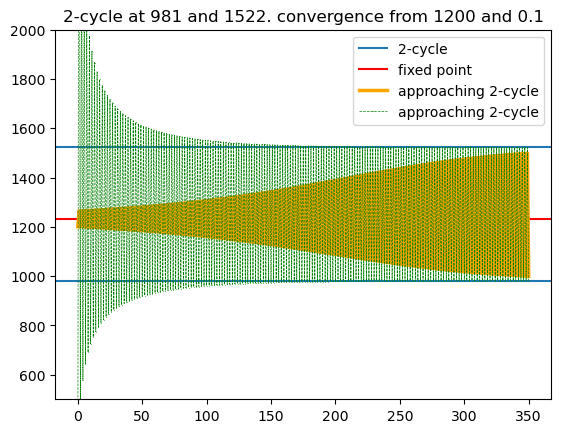

In [114]:
plt.axhline(981.58014867, label='2-cycle')
plt.axhline(1522.0883902)

plt.axhline(1231.84695215, color='red', label='fixed point')

xs = run(lambda x,a,b,s: b*np.exp(-a*x)+s*x, 1200, a=0.001, b=3800, s=0.1, iterations=350)
plt.plot(xs, '-x', color='orange', label='approaching 2-cycle', markersize=0.1, linewidth=2.5)

xs = run(lambda x,a,b,s: b*np.exp(-a*x)+s*x, 0.1, a=0.001, b=3800, s=0.1, iterations=350)
plt.plot(xs, '--x', color='green', label='approaching 2-cycle', markersize=0.1, linewidth=0.5)

plt.ylim(500, 2000)

plt.title(f'2-cycle at 981 and 1522. convergence from 1200 and 0.1')

plt.legend()